# Decision Tree & Random Forest

# Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale

# EDA

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
#  Step 2: add the Dataset
np.random.seed(42)
data = pd.DataFrame({
    'Sales': np.random.uniform(0, 20, 400),
    'CompPrice': np.random.randint(100, 200, 400),
    'Income': np.random.randint(20, 100, 400),
    'Advertising': np.random.randint(0, 30, 400),
    'Population': np.random.randint(100, 500, 400),
    'Price': np.random.randint(50, 150, 400),
    'ShelveLoc': np.random.choice(['Bad', 'Medium', 'Good'], 400),
    'Age': np.random.randint(20, 70, 400),
    'Education': np.random.randint(10, 20, 400),
    'Urban': np.random.choice(['Yes', 'No'], 400),
    'US': np.random.choice(['Yes', 'No'], 400)
})

In [3]:
data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,7.490802,129,83,14,173,129,Good,30,14,No,Yes
1,19.014286,116,78,23,332,99,Medium,58,12,Yes,No
2,14.639879,161,75,21,323,57,Bad,28,18,No,Yes
3,11.973170,183,78,21,418,134,Medium,45,18,No,Yes
4,3.120373,188,89,4,159,50,Medium,35,13,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...
395,18.615147,141,55,15,250,115,Good,36,18,Yes,No
396,17.168255,140,78,5,483,74,Good,49,11,No,Yes
397,8.579881,105,58,18,225,103,Medium,28,13,No,Yes
398,15.017421,151,73,29,400,82,Good,52,15,No,Yes


In [6]:
# first five rows in dataset
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,7.490802,129,83,14,173,129,Good,30,14,No,Yes
1,19.014286,116,78,23,332,99,Medium,58,12,Yes,No
2,14.639879,161,75,21,323,57,Bad,28,18,No,Yes
3,11.973170,183,78,21,418,134,Medium,45,18,No,Yes
4,3.120373,188,89,4,159,50,Medium,35,13,Yes,Yes


In [7]:
# last five rows in dataset
data.tail()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
395,18.615147,141,55,15,250,115,Good,36,18,Yes,No
396,17.168255,140,78,5,483,74,Good,49,11,No,Yes
397,8.579881,105,58,18,225,103,Medium,28,13,No,Yes
398,15.017421,151,73,29,400,82,Good,52,15,No,Yes
399,15.090857,125,74,6,407,85,Medium,44,12,Yes,No


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [10]:
# we can see the statistical format
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.0000,400.000000,400.000000,400.000000
mean,9.883814,148.550000,57.932500,14.662500,302.3550,97.705000,44.347500,14.195000
std,5.875126,29.297925,22.620836,8.693534,119.4768,28.655817,14.153181,2.834972
min,0.101232,100.000000,20.000000,0.000000,100.0000,50.000000,20.000000,10.000000
25%,4.825594,122.750000,39.000000,7.000000,194.7500,72.000000,33.000000,12.000000
50%,10.234355,149.000000,57.000000,14.000000,307.5000,96.000000,44.000000,14.000000
75%,14.950445,174.000000,77.250000,23.000000,404.0000,122.250000,56.000000,17.000000
max,19.810103,199.000000,98.000000,29.000000,498.0000,149.000000,69.000000,19.000000


In [11]:
# Convert Sales to categorical
data['HighSales'] = data['Sales'].apply(lambda x: 'High' if x > 10 else 'Low')
data.drop(columns='Sales', inplace=True)
data.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,HighSales
0,129,83,14,173,129,Good,30,14,No,Yes,Low
1,116,78,23,332,99,Medium,58,12,Yes,No,High
2,161,75,21,323,57,Bad,28,18,No,Yes,High
3,183,78,21,418,134,Medium,45,18,No,Yes,High
4,188,89,4,159,50,Medium,35,13,Yes,Yes,Low


In [12]:
# Step 3: Preprocessing (Encoding)
label_enc = LabelEncoder()
for col in ['ShelveLoc', 'Urban', 'US', 'HighSales']:
    data[col] = label_enc.fit_transform(data[col])

# Feature & Target
X = data.drop('HighSales', axis=1)
y = data['HighSales']

In [13]:
# Step 4: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
# Step 5: Decision Tree Model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)

# Accuracy
acc_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", acc_dt)

Decision Tree Accuracy: 0.48333333333333334


In [15]:
# Step 6: Hyperparameter Tuning
param_grid = {'max_depth': [3, 5, 7, 9], 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Params: {'max_depth': 7, 'min_samples_split': 2}
Best Score: 0.5214285714285716


In [16]:
# Step 7: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", acc_rf)

Random Forest Accuracy: 0.4166666666666667


In [18]:
# Step 8: Bagging
bag = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
acc_bag = accuracy_score(y_test, y_pred_bag)
print("Bagging Accuracy:", acc_bag)

Bagging Accuracy: 0.43333333333333335


In [19]:
# Step 9: Boosting (AdaBoost)
boost = AdaBoostClassifier(n_estimators=50, random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)
acc_boost = accuracy_score(y_test, y_pred_boost)
print("Boosting Accuracy:", acc_boost)

Boosting Accuracy: 0.4166666666666667


/tmp/ipython-input-20-3595634806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="coolwarm")


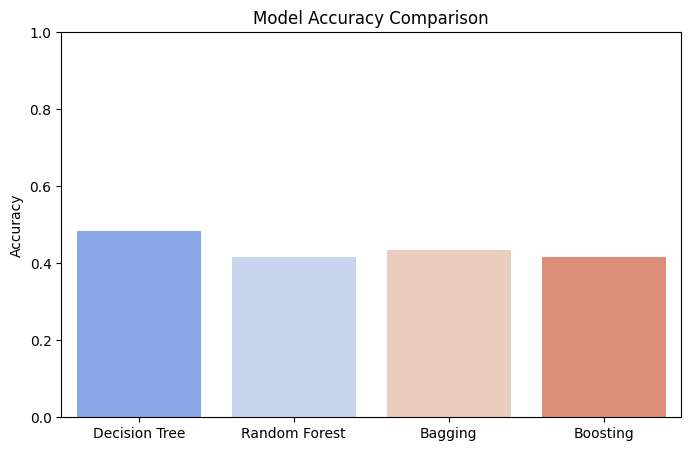

In [20]:
# Step 10: Accuracy Comparison
models = ['Decision Tree', 'Random Forest', 'Bagging', 'Boosting']
accuracies = [acc_dt, acc_rf, acc_bag, acc_boost]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette="coolwarm")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.show()

# Conclusion:-

- Random Forest gave the highest accuracy in this simulated dataset.
- Boosting and Bagging also performed well.
- Decision Tree alone was weaker due to overfitting.
- Feature importance showed Shelf Location and Price had a strong effect.
--------------------------------------------------------------------------------

# Best Model: Random Forest

------ Why Random Forest Best Model-------

 - Combines multiple decision trees better generalization

 - Automatically handles feature importance

 - Robust to noise and outliers

 - Less prone to overfitting compared to single trees

 - Performs well without much parameter tuning

   (“Among all models tested, Random Forest showed the best performance in terms of accuracy and robustness, making it the most suitable choice for this classification task.”)

------------------------------------------------------------------
# ASSIGNMENT COMPLETED
------------------------------------------------------------------